In [1]:
import tensorflow as tf
import cv2
import numpy as np 
import pandas as pd 
import os
from glob import glob
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
# from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

# from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19

In [2]:
path_1 = "C:/Users/Rajat/Documents/Tomato/Tomato/Plant_Diseases_Dataset/train_1"
path_2 = "C:/Users/Rajat/Documents/Tomato/Tomato/Plant_Diseases_Dataset/test_1"
train_path = os.listdir(path_1)
test_path = os.listdir(path_2)

In [3]:
len(train_path)

11

In [4]:
SIZE = [128, 128]

In [5]:
vgg19 = VGG19(input_shape=SIZE + [3], weights="imagenet", include_top=False)

In [6]:
for layer in vgg19.layers:
    layer.trainable = False

In [7]:
x = Flatten()(vgg19.output)

In [8]:
prediction = Dense(len(train_path), activation="softmax")(x)

model = Model(inputs=vgg19.input, outputs=prediction)

In [11]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
trainset = train_datagen.flow_from_directory("C:/Users/Rajat/Documents/Tomato/Tomato/Plant_Diseases_Dataset/train_1",
                                                 target_size=(128, 128),
                                                 batch_size=32,
                                                 class_mode="categorical", shuffle=True)

Found 19349 images belonging to 11 classes.


In [14]:
testset = test_datagen.flow_from_directory("C:/Users/Rajat/Documents/Tomato/Tomato/Plant_Diseases_Dataset/test_1",
                                                 target_size=(128, 128),
                                                 batch_size=32,
                                                 class_mode="categorical", shuffle=False)

Found 4837 images belonging to 11 classes.


In [15]:
model = tf.keras.models.load_model("vgg19_model.h5")

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [17]:
y_pred = model.predict(testset)
y_pred = np.argmax(y_pred, axis=1)
y_pred

152/152 [==============================] - 411s 3s/step


array([ 0,  0,  0, ..., 10, 10, 10], dtype=int64)

In [22]:
def prepare_image(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (128, 128))
    return new_array.reshape(-1, 128, 128, 3)

In [23]:
class_dict = trainset.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9,
 'Tomato__powdery_mildew': 10}

In [20]:
def prediction_cls(prediction):
    for key, clss in class_dict.items():
        if np.argmax(prediction) == clss:
            label = key.split("___")[1]
            label = label.replace('_'," ")
            return label

1/1 [==============================] - 1s 655ms/step


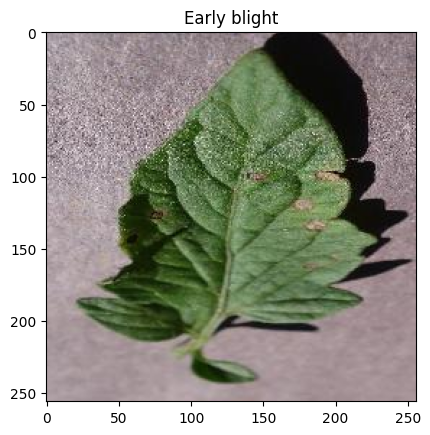

1/1 [==============================] - 0s 171ms/step


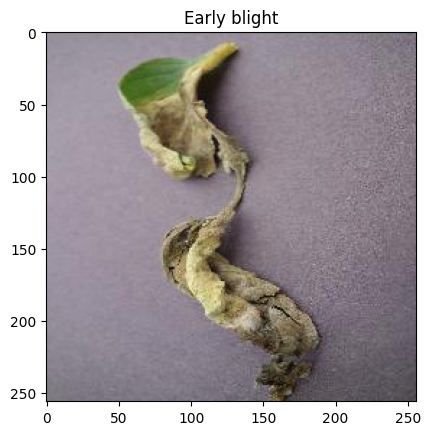

1/1 [==============================] - 0s 179ms/step


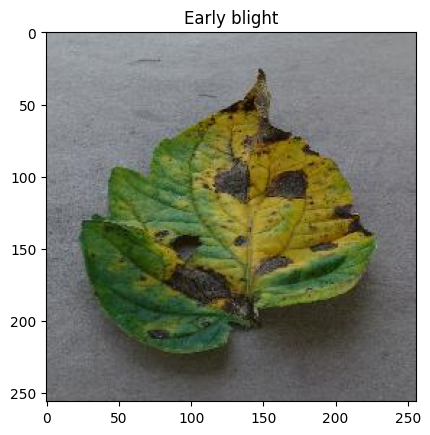

1/1 [==============================] - 0s 229ms/step


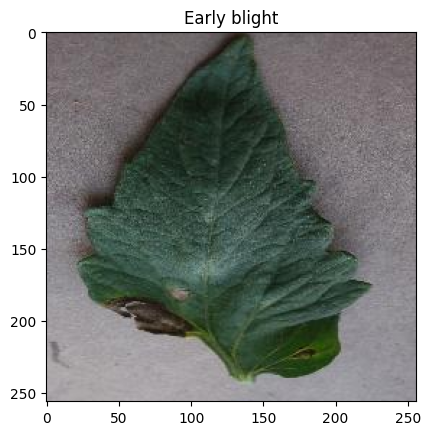

1/1 [==============================] - 0s 240ms/step


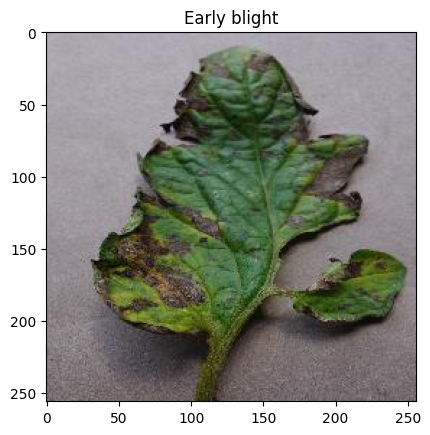

1/1 [==============================] - 0s 177ms/step


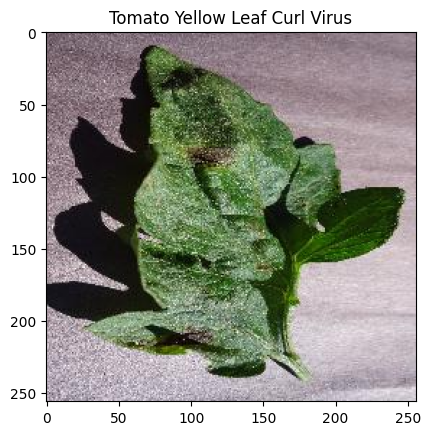

1/1 [==============================] - 0s 166ms/step


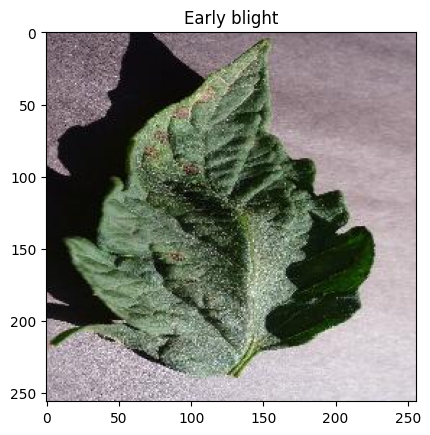

1/1 [==============================] - 0s 158ms/step


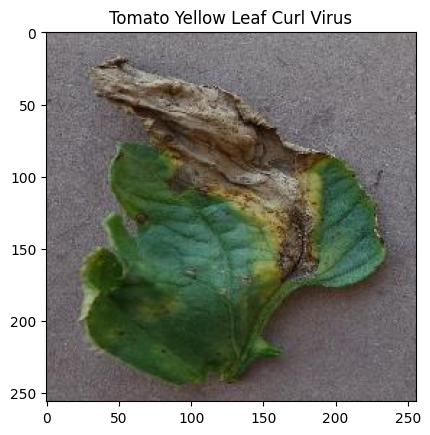

In [21]:
# import required module
import glob
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

# get the path/directory
folder_dir = "C:/Users/Rajat/Desktop/Testing/"

# iterate over files in
# that directory
for images in glob.iglob(f'{folder_dir}/*'):

    # check if the image ends with png
#     if (images.endswith(".JPG")):
#         print(images)

    prediction = model.predict([prepare_image(images)])
    x = prediction_cls(prediction)
    plt.title(x)
#     plt.xlabel("X pixel scaling")
#     plt.ylabel("Y pixels scaling")
 
    image = mpimg.imread(images)
    plt.imshow(image)
    plt.show()

In [ ]:
prediction = model.predict([prepare_image("C:/Users/Rajat/Desktop/1a0a5292-5e63-4afa-8611-38eef316f1e9___GH_HL Leaf 477_180deg.JPG")])
prediction_cls(prediction)